# Hamoye Data Science Internship (Stage-C)
## Name:- Manoj Kumar M P

**Instructions for Tag-Along Project
Stability of the Grid System**

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.<br>

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.<br>

Predictive features:<br>

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);<br>

'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);<br>

'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:<br>

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);<br>

'stabf': a categorical (binary) label ('stable' or 'unstable').<br>

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).<br>

Split the data into an 80-20 train-test split with a random state of “1”.<br>
Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). <br>
Use scikit learn to train a random forest and extra trees classifier. <br>
And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. <br>
Use random_state = 1 for training all models and evaluate on the test set.

In [1]:
# Importing the necessary libraries

import pandas as pd
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report

In [2]:
# Importing the data

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'
df = pd.read_csv(url)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
df = df.drop(columns = 'stab')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [7]:
# X y Split

X = df.drop(['stabf'],axis = 1)
y = df['stabf']

In [8]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [9]:
print("\n" ,X_train.shape,"\n" , X_test.shape,"\n" ,y_train.shape,"\n" , y_test.shape)


 (8000, 12) 
 (2000, 12) 
 (8000,) 
 (2000,)


In [10]:
scaler = StandardScaler()

In [11]:
scaler_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaler_X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


In [12]:
scaler_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaler_X_test

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.119679,-0.675220,-1.382912,1.287865,0.249565,-0.803325,0.734497,-0.369263,0.485786,-0.115528,-1.264683,-1.283117
1996,-1.077913,-0.808691,1.033449,0.337636,-0.166587,0.340913,0.988085,-1.035753,0.952386,0.892766,-1.062502,-1.094114
1997,0.947825,-1.663727,-1.653920,0.532665,-1.518329,1.590144,0.091613,0.974455,-1.233963,0.126391,0.573445,1.319350
1998,-1.120235,0.193979,-0.237805,0.421570,-1.162671,0.738702,0.027367,1.265833,1.524336,0.794087,-1.362323,-0.801971


### 1. What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [13]:
l_gbm = lgbm.LGBMClassifier(random_state=1)

l_gbm.fit(scaler_X_train,y_train)

l_gbm_predict  = l_gbm.predict(scaler_X_test)

round(accuracy_score(y_test, l_gbm_predict),4)

0.9395

### 2. Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

In [14]:
et_class = ExtraTreesClassifier(random_state = 1)

et_class.fit(scaler_X_train,y_train)


ExtraTreesClassifier(random_state=1)

In [15]:
ext=pd.DataFrame(et_class.feature_importances_, index = ['tau1', 'tau2', 
                                                         'tau3', 'tau4', 
                                                         'p1', 'p2', 'p3', 
                                                         'p4', 'g1', 'g2',
                                                         'g3', 'g4']).sort_values(by=0,ascending=False)
ext


,0
tau2,0.118445
tau1,0.117397
tau4,0.115466
tau3,0.113169
g3,0.096883
g4,0.094019
g2,0.093676
g1,0.089783
p3,0.040706
p4,0.040579


**Answer :- tau2,p1**

### 3. Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', <br>n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [16]:
n_estimators = [100, 300, 500, 1000]    
min_samples_split = [7, 5, 2, 2]
min_samples_leaf = [4, 6, 8, 8]
max_features = [None,'auto','log2',None] 
hyperparameter = {'n_estimators': n_estimators,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'max_features': max_features}

In [17]:
R_search = RandomizedSearchCV(estimator = et_class, param_distributions= hyperparameter,
                              random_state=1,cv = 5, n_iter=10,scoring='accuracy',n_jobs=-1, verbose=1)
search = R_search.fit(scaler_X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [18]:
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': None}

### 4. What is the accuracy on the test set using the XGboost classifier? In 4 decimal places. 

In [19]:
xg_boost = XGBClassifier(random_state =1)
xg_boost.fit(scaler_X_train, y_train)
xg_predict = xg_boost.predict(scaler_X_test)
round(accuracy_score(y_test,xg_predict),4)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9455

### 5. What other hyperparameter optimization method can you try apart from Random Search?

**Answer:- Grid Search**

### 6. You are building a classifier and the accuracy is poor on both the training and test sets. Which would you use to try to improve the performance?

**Answer:- Boosting**

### 7. You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 1700 examples in the test set. The confusion matrix of predicted class vs. actual class is: What is the F1 score of this classifier?

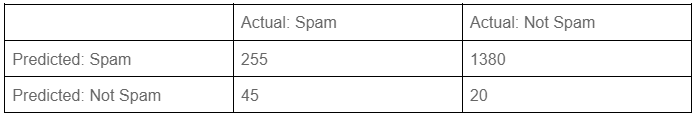

**Answer :- 0.2635**

### 8. Which of the following metric is generally NOT useful for a classification problem?

**Answer:- RMSE Value**

### 9. Jack is working on classification modelling. While evaluating the model, he saw that the difference between test and training error is a big positive number with a low training error. Which of the following, is he currently facing?

**Answer:- Overfitting**

### 10. The ROC curve was generated from a classification algorithm. What can we say about this classifier?

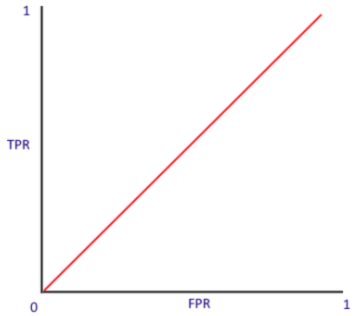

**Answer:- The model has no discrimination capacity to differentiate between the positive and the negative class**

### 11. A classifier predicts if insurance claims are fraudulent or not. The cost of paying a fraudulent claim is higher than the cost of investigating a claim that is suspected to be fraudulent. Which metric should we use to evaluate this classifier?

**Answer:- Recall**

### 12. What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [20]:
r_forest = RandomForestClassifier(random_state=1)
r_forest.fit(scaler_X_train,y_train)

RandomForestClassifier(random_state=1)

In [21]:
rf_predict = r_forest.predict(scaler_X_test)
round(accuracy_score(y_test, rf_predict),4)

0.929

### 13. What is the entropy of the target variable if its actual values are given as:<br>[1,0,1,1,0,1,0]

**Answer:- - 3/7 log(3/7) - 4/7 log(4/7)**

### 14. Which of these is not a good metric for evaluating classification algorithms for data with imbalanced class problems?

**Answer:- Accuracy**

### 15. According to a use-case, in a certain ML task, a false positive is six times costlier than a false negative. You, as a Data Scientist, trained 4 models, to solve the use case.<br>Keep the following evaluation criteria in mind:<br><br>1) Must have a recall rate of at least 80% <br>2) Must have a false positive rate of 8% or less <br>3) Must minimize business costs<br><br>After creating each binary classification model, you generated the corresponding confusion matrix. Which confusion matrix represents the model that satisfies the requirements? 

**Answer:- TN = 96%, FP = 4%, FN = 10%, TP = 90%**

### 16. Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [22]:
et_class = ExtraTreesClassifier(random_state = 1)

et_class.fit(scaler_X_train,y_train)

et_class_predict  = et_class.predict(scaler_X_test)

round(accuracy_score(y_test, et_class_predict),4)

0.928

In [23]:
et_class = ExtraTreesClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 2,
                                min_samples_leaf = 6, max_features = None)

et_class.fit(scaler_X_train,y_train)

et_class_predict  = et_class.predict(scaler_X_test)

round(accuracy_score(y_test, et_class_predict),4)

0.932

**Answer:- Higher**

### 17. A medical company is building a model to predict the occurrence of thyroid cancer. The training data contains 900 negative instances (people who don't have cancer) and 100 positive instances. The resulting model has 90% accuracy, but extremely poor recall. What steps can be used to improve the model's performance? (SELECT TWO)

**Answer:- <br>Collect more data for the positive case<br>Generate synthetic samples/data using SMOTE**

### 18. A random forest classifier was used to classify handwritten digits 0-9 into the numbers they were intended to represent. The confusion matrix below was generated from the results. Based on the matrix, which number was predicted with the least accuracy?

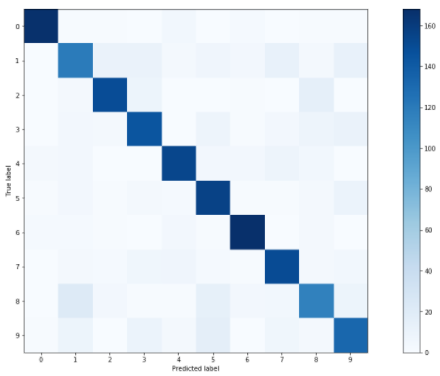

**Answer:- 8**

### 19. You are developing a machine learning classification algorithm that categorizes handwritten digits 0-9 into the numbers they represent. How should you pre-process the label data?

**Answer:- One-hot encoding**

### 20. Why do we use weak learners in boosting, instead if strong learners?

**Answer:- To prevent overfitting**

# THANK YOU!